# Degrading Performance in Systematic Trading

In quantitative trading, the "edge" refers to the statistical advantage a strategy has over randomness. This edge is determined by parameters like:

- Average Winner P/L ($\text{Avg Win}$)
- Average Loser P/L ($\text{Avg Loss}$)
- Probability of Winning Trades ($\text{P(Win)}$)
- Probability of Losing Trades ($\text{P(Loss)}$)

### Key Concepts:
1. **Positive Edge:** A strategy is considered profitable if:
$$
\text{Edge} = \text{P(Win)} \times \text{Avg Win} - \text{P(Loss)} \times \text{Avg Loss} > 0
$$
2. **Non-Stationarity:** The parameters that define edge often change over time due to market dynamics.

### Objectives:
1. Demonstrate how trading edge evolves over time.
2. Simulate scenarios where a strategy's edge transitions from positive to negative.
3. Discuss how underlying dynamics are unknown, necessitating modeling and monitoring.

---


## Simulating Trading Edge Over Time

To illustrate the evolution of edge, we'll:

1. Simulate trading outcomes with a positive edge over a time series.
2. Introduce non-stationarity to model the transition from positive to negative edge.

---


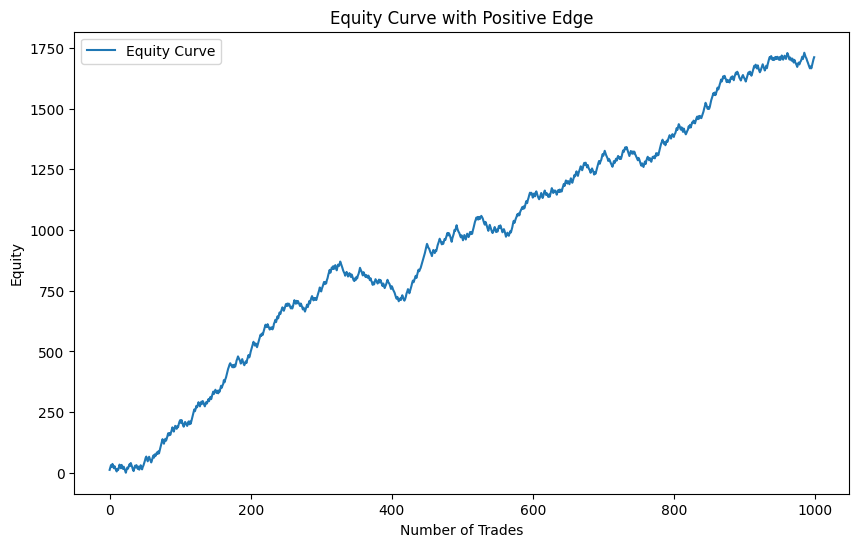

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation
n_trades = 1000

# Positive edge parameters
p_win = 0.55  # Probability of a win
avg_win = 10   # Average P/L for winning trades
avg_loss = -8  # Average P/L for losing trades

# Generate outcomes
win_lose = np.random.choice([1, -1], size=n_trades, p=[p_win, 1 - p_win])
trade_pnl = np.where(win_lose == 1, np.random.normal(avg_win, 2, n_trades), np.random.normal(avg_loss, 2, n_trades))
equity_curve = np.cumsum(trade_pnl)

# Plot equity curve
plt.figure(figsize=(10, 6))
plt.plot(equity_curve, label="Equity Curve")
plt.title("Equity Curve with Positive Edge")
plt.xlabel("Number of Trades")
plt.ylabel("Equity")
plt.legend()
plt.show()

## Introducing Non-Stationarity

To simulate a transition from positive to negative edge:

1. Introduce time-varying parameters for $\text{P(Win)}$, $\text{Avg Win}$, and $\text{Avg Loss}$.
2. Gradually decrease $\text{P(Win)}$ below 0.5 and increase $\text{Avg Loss}$.

---


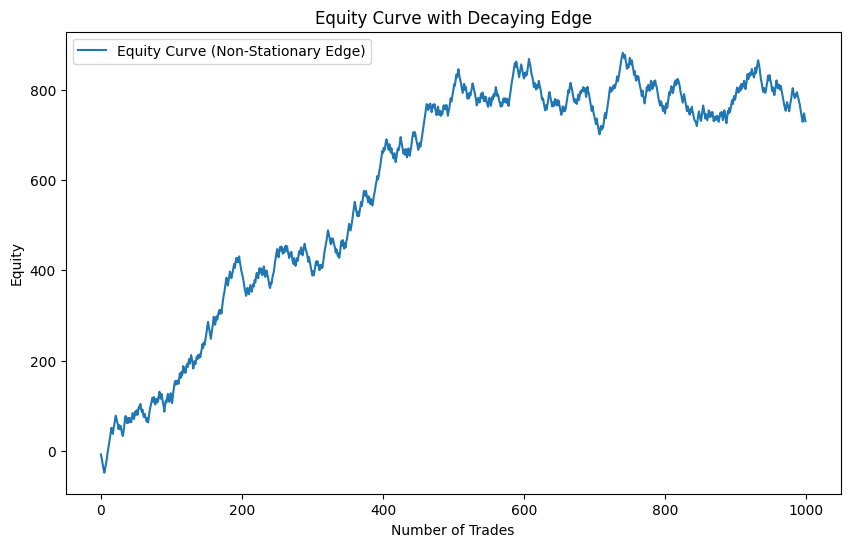

In [3]:
# Non-stationary edge parameters
n_trades = 1000
p_win_decay = np.linspace(0.55, 0.4, n_trades)  # Gradual decay in P(Win)

# Simulate non-stationary outcomes
trade_pnl_decay = []
for i in range(n_trades):
    if np.random.rand() < p_win_decay[i]:
        trade_pnl_decay.append(np.random.normal(avg_win, 2))
    else:
        trade_pnl_decay.append(np.random.normal(avg_loss, 2))

trade_pnl_decay = np.array(trade_pnl_decay)
equity_curve_decay = np.cumsum(trade_pnl_decay)

# Plot equity curve with non-stationary edge
plt.figure(figsize=(10, 6))
plt.plot(equity_curve_decay, label="Equity Curve (Non-Stationary Edge)")
plt.title("Equity Curve with Decaying Edge")
plt.xlabel("Number of Trades")
plt.ylabel("Equity")
plt.legend()
plt.show()


## Discussion: Why Model Dynamics?

### Unknown Underlying Dynamics
The dynamics of a trading strategy's performance parameters are inherently unknown. For instance:

1. **Mean-Reverting (Ornstein-Uhlenbeck Process):**
   $$
   dX_t = \theta (\mu - X_t) dt + \sigma dW_t
   $$
   Models parameters that revert to a mean over time.

2. **Drift or Trend:** Parameters may exhibit a directional drift.

3. **Regime Shifts:** Market conditions can change abruptly, causing jumps or shifts in parameters.

### Key Takeaway
This non-stationarity highlights the importance of:
1. Continuously monitoring strategy performance.
2. Retiring strategies when edge becomes consistently negative.
3. Using statistical models to adapt to changing market regimes.

---


### Degrading Equity Curve | Linear Changes in Probability

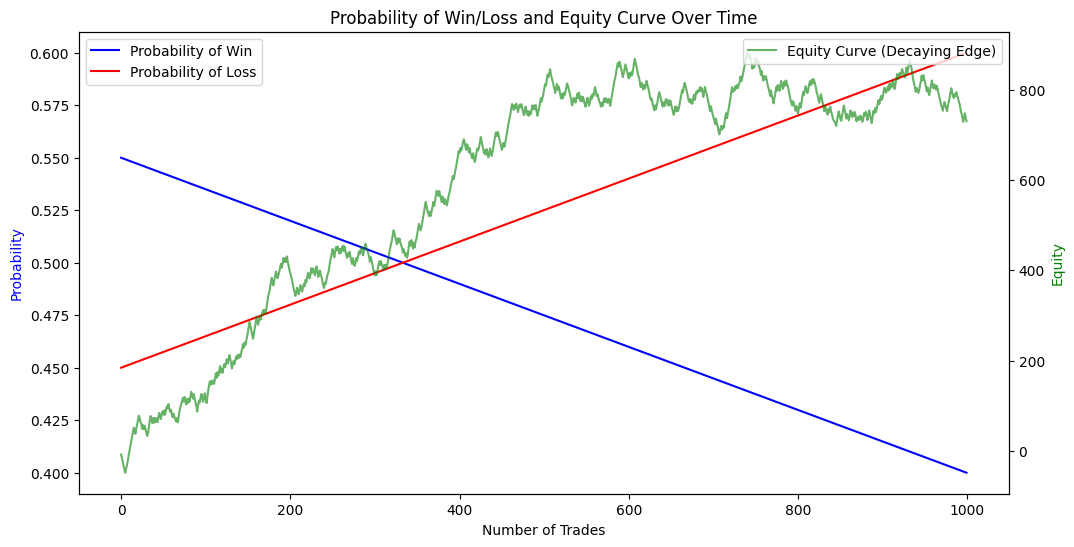

In [4]:
# Plotting Probability of Win and Loss Over Time with Equity Curve
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin y-axis for probabilities and equity curve
ax2 = ax1.twinx()

# Plot probability of win and loss
ax1.plot(p_win_decay, color="blue", label="Probability of Win")
ax1.plot(1 - p_win_decay, color="red", label="Probability of Loss")

# Plot equity curve
ax2.plot(equity_curve_decay, color="green", label="Equity Curve (Decaying Edge)", alpha=0.6)

# Labels and title
ax1.set_xlabel("Number of Trades")
ax1.set_ylabel("Probability", color="blue")
ax2.set_ylabel("Equity", color="green")
plt.title("Probability of Win/Loss and Equity Curve Over Time")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


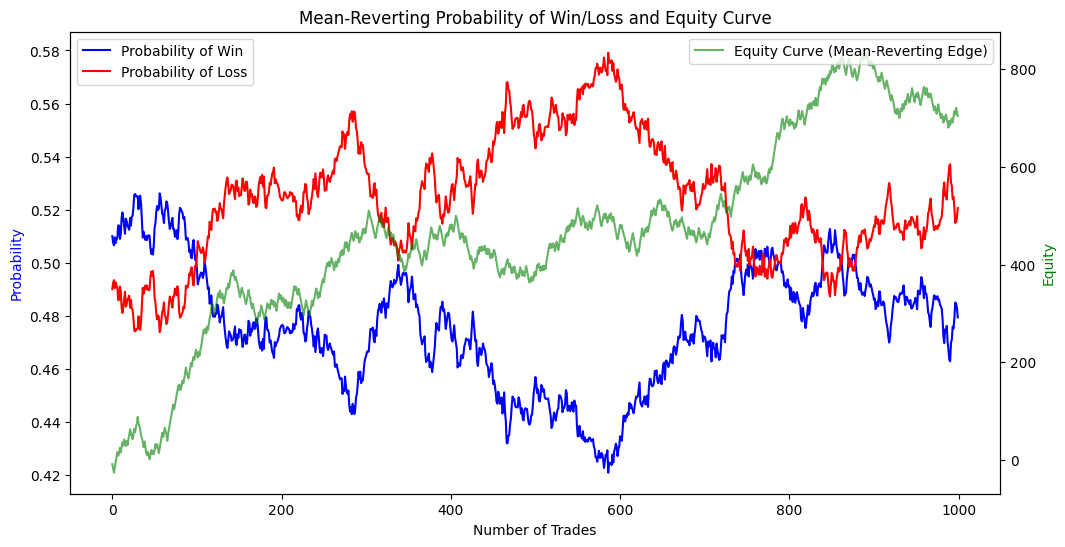

In [10]:
# Simulating mean-reverting probabilities (Ornstein-Uhlenbeck process)
theta = 0.1  # Mean-reversion speed
mu = 0.51    # Long-term mean for P(Win)
sigma = 0.09  # Volatility
dt = 1 / n_trades

# Generate mean-reverting probabilities for P(Win)
p_win_mean_reverting = [mu]
for _ in range(n_trades - 1):
    prev = p_win_mean_reverting[-1]
    dw = np.random.normal(0, np.sqrt(dt))
    next_val = prev + theta * (mu - prev) * dt + sigma * dw
    p_win_mean_reverting.append(min(max(next_val, 0), 1))  # Keep probabilities in [0, 1]

# Simulate outcomes with mean-reverting probabilities
trade_pnl_mean_reverting = []
for i in range(n_trades):
    if np.random.rand() < p_win_mean_reverting[i]:
        trade_pnl_mean_reverting.append(np.random.normal(avg_win, 2))
    else:
        trade_pnl_mean_reverting.append(np.random.normal(avg_loss, 2))

trade_pnl_mean_reverting = np.array(trade_pnl_mean_reverting)
equity_curve_mean_reverting = np.cumsum(trade_pnl_mean_reverting)

# Plot probability of win and equity curve for mean-reverting case
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(p_win_mean_reverting, color="blue", label="Probability of Win")
ax1.plot(1 - np.array(p_win_mean_reverting), color="red", label="Probability of Loss")
ax2.plot(equity_curve_mean_reverting, color="green", label="Equity Curve (Mean-Reverting Edge)", alpha=0.6)

ax1.set_xlabel("Number of Trades")
ax1.set_ylabel("Probability", color="blue")
ax2.set_ylabel("Equity", color="green")
plt.title("Mean-Reverting Probability of Win/Loss and Equity Curve")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


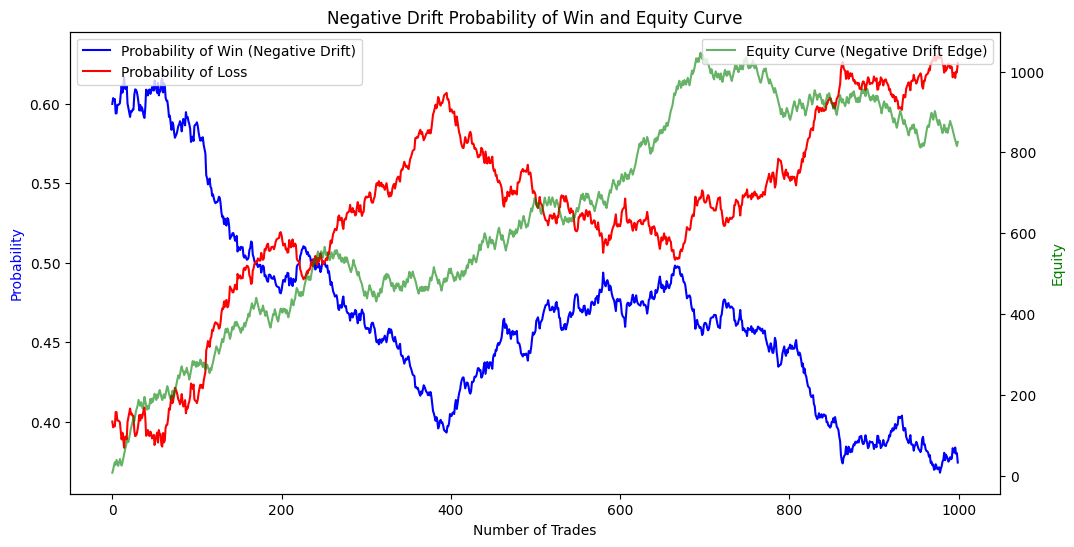

In [23]:
# Parameters for GBM with negative drift
mu_drift = -0.4  # Negative drift
sigma_drift = 0.2  # Volatility

# Generate stochastic probabilities with negative drift
p_win_drift_stochastic = [0.6]
for _ in range(n_trades - 1):
    dw = np.random.normal(0, np.sqrt(dt))
    next_val = p_win_drift_stochastic[-1] * np.exp((mu_drift - 0.5 * sigma_drift**2) * dt + sigma_drift * dw)
    p_win_drift_stochastic.append(min(max(next_val, 0), 1))  # Keep probabilities in [0, 1]

# Simulate outcomes with probabilities having negative drift
trade_pnl_drift_stochastic = []
for i in range(n_trades):
    if np.random.rand() < p_win_drift_stochastic[i]:
        trade_pnl_drift_stochastic.append(np.random.normal(avg_win, 2))
    else:
        trade_pnl_drift_stochastic.append(np.random.normal(avg_loss, 2))

trade_pnl_drift_stochastic = np.array(trade_pnl_drift_stochastic)
equity_curve_drift_stochastic = np.cumsum(trade_pnl_drift_stochastic)

# Plot probability of win and equity curve for stochastic negative drift case
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(p_win_drift_stochastic, color="blue", label="Probability of Win (Negative Drift)")
ax1.plot(1 - np.array(p_win_drift_stochastic), color="red", label="Probability of Loss")
ax2.plot(equity_curve_drift_stochastic, color="green", label="Equity Curve (Negative Drift Edge)", alpha=0.6)

ax1.set_xlabel("Number of Trades")
ax1.set_ylabel("Probability", color="blue")
ax2.set_ylabel("Equity", color="green")
plt.title("Negative Drift Probability of Win and Equity Curve")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


## Conclusion

Trading edge is not static. Non-stationarity in key parameters can erode profitability over time. By:

1. Simulating trading performance,
2. Monitoring edge transitions,
3. Understanding underlying dynamics,

we can make informed decisions about when to adapt or retire a strategy.

---
